In [1]:
from pathlib import Path
import os
import numpy as np

In [2]:
### Function for analysis output data ###

## Import library ##
# Module with scientific computing functions (matrix/vector)
import numpy as np
# Modules with reading MHD/raw format
import SimpleITK as sitk
# Modules with reading/writing folder/file functions
import os

## Set the filenames and read data from mhd/raw file (Dose Gate) ## 
def SetFile(output_folder, input_dose, input_squared, input_uncert):         
    f_dose = os.path.join(output_folder, input_dose)
    f_squared = os.path.join(output_folder, input_squared)   
    f_uncert = os.path.join(output_folder, input_uncert)  
    # Dose
    dose_gate = sitk.ReadImage(f_dose)
    dose = sitk.GetArrayFromImage(dose_gate)
    # Squared Dose
    squared_gate = sitk.ReadImage(f_squared)
    squared = sitk.GetArrayFromImage(squared_gate)
    # Uncertainty dose
    uncert_gate= sitk.ReadImage(f_uncert)
    uncert = sitk.GetArrayFromImage(uncert_gate)
    # Image rotations 
    dose = np.swapaxes(dose,0,2)
    dose = np.flip(dose,2)
    squared = np.swapaxes(squared,0,2)
    squared = np.flip(squared,2)
    uncert = np.swapaxes(uncert,0,2)
    uncert = np.flip(uncert,2)
    return dose, squared, uncert

## Dose/Uncertainty Evaluation: Percentage Depth Dose (PDD) ##
def dose_z(dose, squared):
    dz = 0.0
    dz_array = []
    # Variance of dose
    squared_dz = 0.0
    # The relative uncertainty of dose 
    delta_dz = 0.0 
    delta_dz_array = []
    for z in range (0,97): # range ( 0, total voxel)
        for y in range(47,50): # range ( (total voxel/2)-1.5, (total voxel/2)-1.5 +3) )
            for x in range (47,50): # range ( (total voxel/2)-1.5, (total voxel/2)-1.5 +3) )
                dz = dz + dose[x,y,z]
                squared_dz = squared_dz + squared[x,y,z]
                if dz != 0:
                    delta_dz = ((np.sqrt(squared_dz))/dz)*100
                else:
                    delta_dz = 0
        dz_array.append(dz)
        delta_dz_array.append(delta_dz)
        dz = 0.0
        squared_dz = 0.0
        delta_dz = 0.0      
    return dz_array, delta_dz_array

## Dose/Uncertainty Evaluation: Off Center Ratio (OCR) ##
def dose_y(dose, squared, z_depth):
    dy = 0.0
    dy_array = []
    # Variance of dose
    squared_dy = 0.0
    # The relative uncertainty of dose 
    delta_dy = 0.0 
    delta_dy_array = []
    for y in range (0,97): # range ( 0, total voxel)
        for x in range(47,50): # range ( (total voxel/2)-1.5, (total voxel/2)-1.5 +3) )
            for z in range (z_depth,z_depth+1):
                dy = dy + dose[x,y,z]
                squared_dy = squared_dy + squared[x,y,z]
                if dy != 0:
                    delta_dy = ((np.sqrt(squared_dy))/dy)*100
                else:
                    delta_dy = 0
        dy_array.append(dy)
        delta_dy_array.append(delta_dy)
        dy = 0.0
        squared_dy = 0.0
        delta_dy = 0.0      
    return dy_array, delta_dy_array



In [3]:
#############################
###### Read output data #####
#############################

# Change by your own output folder 
output_folder = Path('./output')

# Read mhd/raw file: dose, dose squared  and dose uncertainty 
dose, squared, uncert = SetFile(output_folder, 'run01-Dose.mhd', 'run01-Dose-Squared.mhd', 'run01-Dose-Uncertainty.mhd')

#############################
#### PDD + uncertainties ####
#############################
dz, delta_dz = dose_z(dose, squared)

# Data folder after analysis
os.makedirs('./output/data_analysis', exist_ok=True)
dir_path = Path ('./output/data_analysis')

# Depth values: stat=5, stop=485, num=97
depth = np.linspace(5,485,97)

# Save dose_z file: in txt
name_dz = 'dose_z.txt'
folder_dz = os.path.join(dir_path, name_dz)
header_dz = 'z(mm) dose_z(Gy) delta_dose_z'
dz_col = np.column_stack([depth, dz, delta_dz])
fmt_col = ['%i','%.2e','%.2f']
#np.savetxt(folder_dz, dz_col, fmt=fmt_col, header=header_dz)
print('Save file', name_dz)

#############################
#### OCR + uncertainties ####
#############################
z_depth = 5 # Voxel number of depth; "5" mean 30 mm
dy, delta_dy = dose_y(dose, squared, z_depth)

# Position values: stat=-240, stop=240, num=97
position = np.linspace(-240,240,97)

# Save dose_y file: in txt
name_dy = 'dose_y.txt'
folder_dy = os.path.join(dir_path, name_dy)
header_dy = 'y(mm) dose_y(Gy) delta_dose_y'
dy_col = np.column_stack([position, dy, delta_dy])
fmt_col = ['%i','%.2e','%.2f']
#np.savetxt(folder_dy, dy_col, fmt=fmt_col, header=header_dy)
print('Save file', name_dy)

# test visual --------------------------------------------------------------------------
print(type(dz))
print("len of depth", len(depth))

IndexError: index 47 is out of bounds for axis 0 with size 11

In [ ]:
print(dose.ndim)

3


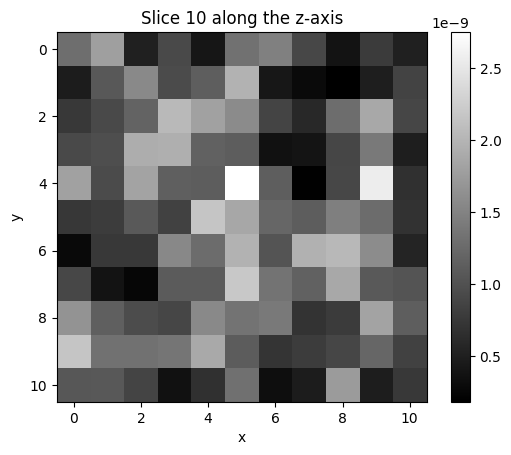

In [14]:
import matplotlib.pyplot as plt

# Assuming you have loaded the image using SimpleITK
f_dose = os.path.join(output_folder, 'run01-Dose.mhd')
image = sitk.ReadImage(f_dose)

# Convert the image to a NumPy array for display
array = sitk.GetArrayFromImage(image)

# Select a specific slice to display
slice_index = 10 # Adjust the slice index as needed

# Display the selected slice using Matplotlib
plt.imshow(array[:, :, slice_index], cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Slice {} along the z-axis'.format(slice_index))
plt.colorbar()  # Optionally, show a colorbar for intensity scale
plt.show()